<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699">Introduction to the Web Time Series Service (WTSS) in R</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/R/wtss/wtss-introduction.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br>

<div style="text-align: center;font-size: 90%;">
    Felipe Carvalho de Souza<sup><a href="https://orcid.org/0000-0002-5826-1700"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Menino Carlos<sup><a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto R. Queiroz<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: March 24, 2021
</div>

<br>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use the WTSS service to extract time series from <em>Earth Observation Data Cubes</em>.
</div>    

<br>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Vinhas, L.; Queiroz, G. R.; Ferreira, K. R.; Camara, G. <a href="http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004" target="_blank">Web Services for Big Earth Observation Data</a>. Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.
    </div>
</div>

# Introduction
<hr style="border:1px solid #0077b9;">

The **W**eb **T**ime **S**eries **S**ervice (WTSS) is a lightweight web service for handling time series data from remote sensing imagery. Given a location and a time interval you can retrieve the according time series as a list of real values.


In WTSS a coverage is a three dimensional array associated to spatial and temporal reference systems (Figure 1).

<div align="center">
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/image-time-series.png" width="240" />
    <br/>
    <b>Figure 1</b> - A coverage as a three dimensional array.
</div>

WTSS is based on three operations:

- ``list_coverages``: returns the list of all available coverages in the service.

- ``describe_coverage``: returns the metadata of a given coverage.

- ``time_series``: query the database for the list of values for a given location and time interval.

This Jupyter Notebook shows how to use WTSS in Python with Brazil Data Cube data.

# R Client API
<hr style="border:1px solid #0077b9;">

The command below installs the additional packages that are required to run this Jupyter Notebook.

In [1]:
# Remove '#' to install the packages
# install.packages(c("remotes", "magrittr", "dplyr", "tibble", "ggplot2"))

For running the examples in this Jupyter Notebook you will need to install the [Rwtss client for R](https://github.com/e-sensing/Rwtss). The command below installs `Rwtss` direct from the code repository of the Brazil Data Cube project using [remotes](https://CRAN.R-project.org/package=remotes).

In [2]:
# Remove '#' to install the package
# remotes::install_github("e-sensing/Rwtss", upgrade = "never")

In [3]:
library(Rwtss)    # Package wtss
library(magrittr) # Package to use pipe operator %>%
library(dplyr)    # Package to handle with data frame
library(tibble)   # Package to represent data frame structure
library(ggplot2)  # Package to create graphics 

Rwtss - R interface to Web Time Series Service.

Loaded Rwtss v0.9.2.
        See ?Rwtss for help, citation("Rwtss") for use in publication.
        See demo(package = "Rwtss") for examples.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Before we start, let's create a variable that corresponds to the URL of the INPE WTSS service.

In [4]:
wtss_inpe <- "https://brazildatacube.dpi.inpe.br/wtss"

# Listing the Available Data Products
<hr style="border:1px solid #0077b9;">

The function `list_coverages` allows to list the available coverages:

In [5]:
Rwtss::list_coverages(wtss_inpe)

[1] "MYD13Q1-6"               "MOD13Q1-6"              
 [3] "S2-SEN2COR_10_16D_STK-1" "LC8_30_16D_STK-1"       
 [5] "CB4MUX_20_1M_STK-1"      "LC8_30_6M_MEDSTK-1"     
 [7] "CB4_64_16D_STK-1"        "LANDSAT-MOZ_30_1M_STK-1"
 [9] "S2-MOSAIC-4M-1"          "S2_Yanomami-6M-1"       
[11] "S2-16D-2"                "S2-MOSAIC-3M-1"         
[13] "CB4-16D-2"               "CBERS-WFI_64_8D_LCF-1"

The names returned by property can be used in subsequent operations.

The complete documentation of `list_coverages` function can be found using `?Rwtss::list_coverages`. Like the cell presented bellow:

In [6]:
# ?Rwtss::list_coverages

# Retrieving the Metadata of a Data Product
<hr style="border:1px solid #0077b9;">

It is possible to access the metadata of a specific coverage with the `describe_coverage` function:

**MOD13Q1 product**

In [7]:
Rwtss::describe_coverage(wtss_inpe, name = "MOD13Q1-6")

---------------------------------------------------------------------
WTSS server URL = https://brazildatacube.dpi.inpe.br/wtss
Cube (coverage) = MOD13Q1-6

|satellite|sensor|bands                                                                                                                                                                                                                                                                                                       |
|:--------|:-----|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|TERRA    |MODIS |relative_azimuth_angle   , composite_day_of_the_year, view_zenith_angle        , sun_zenith_angle         , pixel_reliability        , blue_reflectance         , red_reflectance        

**MOD13Q1_M product**

In [8]:
coverage <- Rwtss::describe_coverage(wtss_inpe, name = "MOD13Q1-6")

---------------------------------------------------------------------
WTSS server URL = https://brazildatacube.dpi.inpe.br/wtss
Cube (coverage) = MOD13Q1-6

|satellite|sensor|bands                                                                                                                                                                                                                                                                                                       |
|:--------|:-----|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|TERRA    |MODIS |relative_azimuth_angle   , composite_day_of_the_year, view_zenith_angle        , sun_zenith_angle         , pixel_reliability        , blue_reflectance         , red_reflectance        

The coverage metadata includes its range in the spatial and temporal dimensions, the list of attributes associated to the cells, and the timeline.


Let's inspect the metadata with more detail:

In [9]:
names(coverage)

[1] "URL"            "satellite"      "sensor"         "name"          
 [5] "bands"          "scale_factors"  "missing_values" "minimum_values"
 [9] "maximum_values" "timeline"       "nrows"          "ncols"         
[13] "xmin"           "xmax"           "ymin"           "ymax"          
[17] "xres"           "yres"           "crs"

In [10]:
coverage$name

[1] "MOD13Q1-6"

In [11]:
coverage$satellite

satellite 
  "TERRA"

In [12]:
coverage$sensor

sensor 
"MODIS"

In [13]:
cat("nrows: ", coverage$nrows)
cat("\n")
cat("ncols: ", coverage$ncols)

nrows:  3663
ncols:  4928

In [14]:
cat("xmin: ", paste(coverage$xmin))
cat("\n")
cat("xmax: ", paste(coverage$xmax))
cat("\n")
cat("ymin: ", paste(coverage$ymin))
cat("\n")
cat("ymax: ", paste(coverage$ymax))

xmin:  -81.234129
xmax:  -30
ymin:  -40
ymax:  10

In [15]:
start_date <- min(coverage$timeline[[1]])
end_date <- max(coverage$timeline[[1]])

sprintf("Interval range: [%s, %s]", start_date, end_date)

[1] "Interval range: [2000-02-18, 2023-02-02]"

For more, you can find the complete documentation of `describe_coverage` function in `?Rwtss::describe_coverage`

# Retrieving the Time Series
<hr style="border:1px solid #0077b9;">

In order to retrieve the time series for attributes `red` and `nir`, in the location of `latitude -12` and `longitude -54` from `January 1st, 2001` to `December 31st, 2001`, use the `time_series` function:

In [16]:
ts <- Rwtss::time_series(wtss_inpe,
                         attributes = c("red_reflectance", "NIR_reflectance"),
                         latitude   = -12.0,
                         longitude  = -54.0,
                         name       = "MOD13Q1-6",
                         start_date = "2001-01-01",
                         end_date   = "2001-12-31")

The attributes returned from function `time_series` are listed in the cell below:

In [17]:
tibble::glimpse(ts)

Rows: 1
Columns: 7
$ longitude   <dbl> -54
$ latitude    <dbl> -12
$ start_date  <date> 2001-01-01
$ end_date    <date> 2001-12-31
$ label       <chr> "NoClass"
$ cube        <chr> "MOD13Q1-6"
$ time_series <list> [<tbl_df[23 x 3]>]


Each time series can be accessed by the attribute `time_series`, e.g.:`ts$time_series[[1]]$nir`

In [18]:
head(ts$time_series[[1]])

Index,red_reflectance,NIR_reflectance
<date>,<dbl>,<dbl>
2001-01-01,0.0236,0.3463
2001-01-17,0.0289,0.3656
2001-02-02,0.0268,0.2883
2001-02-18,0.0374,0.4130
2001-03-06,0.0484,0.2910
2001-03-22,0.0243,0.3300


For more, you can find the complete documentation of `time_series` function in `?Rwtss::describe_coverage`

# Visualizing the Time Series
<hr style="border:1px solid #0077b9;">

The returned time series can be visualized using the `plot` function. Let's visualize the time series we have seen before:

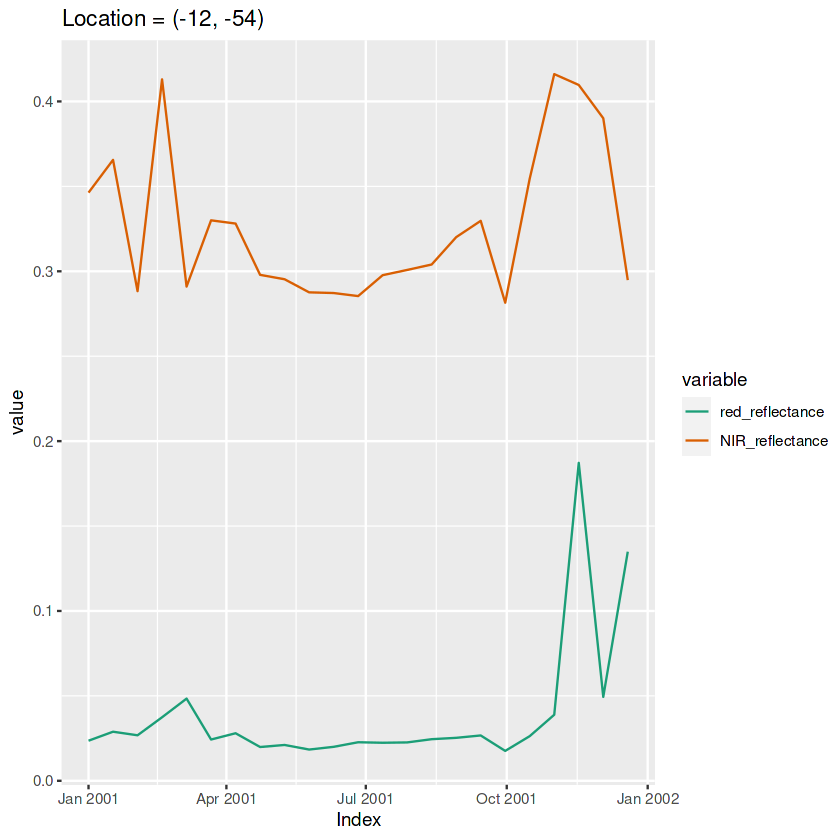

In [19]:
plot(ts)

# References
<hr style="border:1px solid #0077b9;">

- [WTSS Server](https://github.com/brazil-data-cube/wtss)

- [WTSS OpenAPI 3 Specification](https://github.com/brazil-data-cube/wtss-spec)

- [R Client Library for Web Time Series Service - Github Repository](https://github.com/e-sensing/wtss)